# 데이터 전처리와 스케일 조정

- 데이터를 모델링하기 전에는 반드시 스케일링 과정을 거쳐야 함
- 스케일링을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어 줌
- 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지
- 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상


- StandardScaler
  - 각 특성의 평균을 0, 분산을 1로 변경하여 특성의 스케일을 맞춤
  - 최솟값과 최댓값의 크기를 제한하지 않음
- RobustScaler
  - 평균과 분산 대신에 중간값과 사분위 값을 사용함
  - 중간값은 정렬시 중간에 있는 값을 의미하고, 사분위값은 1/4, 3/4에 위치한 값을 의미함
  - 전체 데이터와 아주 동떨어진 데이터 포인트(이상치)에 영향을 받지 않음
- MinMaxScaler
  - 모든 특성이 0과 1 사이에 위치하도록 데이터를 변경함
- Normalizer
  - 위와 다른 스케일 조정법으로 특성 벡터의 유클리디안 길이가 1이 되도록 조정함
  - 즉 길이가 1인 원 또는 구로 투영하는 것이고, 각도만이 중요할 때 적용함
  - l1, l2, max 옵션을 제공하며 유클리디안 거리인 l2가 기본값임


# 주가 데이터를 정규화하기

- 사이킷런(scikit-learn)
  - 파이썬에서 머신러닝 분석을 위해 사용할 수 있는 라이브러리
  - 머신러닝을 위한 다양한 알고리즘과 개발을 위한 편리한 프레임워크, API를 제공
- sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalize 해주기
  - MinMaxScaler를 해주면 전체 데이터는 0, 1사이의 값을 갖게 됨


In [1]:
import numpy as np
import pandas as pd
import yfinance as yfin
from pandas_datareader import data

In [2]:
df_price = yfin.download("NVDA", start="2023-01-01", end="2024-05-28")

C:\Users\bbang\AppData\Local\Temp\ipykernel_21444\1026581699.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_price = yfin.download("NVDA", start="2023-01-01", end="2024-05-28")
[*********************100%***********************]  1 of 1 completed


In [3]:
df_price.reset_index(inplace=True)
df_price

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2023-01-03,14.302285,14.982681,14.083480,14.837809,401277000
1,2023-01-04,14.735900,14.839808,14.228352,14.554062,431324000
2,2023-01-05,14.252332,14.551066,14.135435,14.478131,389168000
3,2023-01-06,14.845803,14.996669,14.021536,14.461145,405044000
4,2023-01-09,15.614120,16.041739,15.127552,15.270425,504231000
...,...,...,...,...,...,...
346,2024-05-20,94.742287,95.162118,93.402824,93.712698,318764000
347,2024-05-21,95.348045,95.362040,93.142922,93.561754,328946000
348,2024-05-22,94.912224,95.981798,93.211904,95.421024,548648000


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ["Open", "High", "Low", "Close", "Volume"]
df_scaled = scaler.fit_transform(df_price[scale_cols])
df_scaled

array([[4.18765885e-03, 4.69751506e-03, 6.96485549e-04, 5.41945579e-04,
        1.50901165e-01],
       [1.03303193e-03, 3.14254164e-03, 2.32540334e-03, 5.24623599e-03,
        1.73229289e-01],
       [1.88844789e-04, 0.00000000e+00, 1.28066236e-03, 0.00000000e+00,
        1.41902888e-01],
       ...,
       [9.00091288e-01, 8.86257498e-01, 8.90404844e-01, 8.75079951e-01,
        2.60413524e-01],
       [9.73094655e-01, 9.98313711e-01, 9.83365661e-01, 9.71044669e-01,
        4.73251879e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.71869403e-01]])

In [5]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols
df_scaled

,Open,High,Low,Close,Volume
0,0.004188,0.004698,0.000696,0.000542,0.150901
1,0.001033,0.003143,0.002325,0.005246,0.173229
2,0.000189,0.000000,0.001281,0.000000,0.141903
3,0.000000,0.004850,0.000000,0.006439,0.153700
4,0.008997,0.016224,0.012436,0.014774,0.227407
...,...,...,...,...,...
346,0.881099,0.877336,0.892552,0.873236,0.089585
347,0.879420,0.879512,0.889629,0.879808,0.097152
348,0.900091,0.886257,0.890405,0.875080,0.260414
349,0.973095,0.998314,0.983366,0.971045,0.473252


# 학습 데이터셋과 테스트 데이터셋 생성하기

- TEST_SIZE=30
  - 학습은 과거부터 30일 이전의 데이터를 학습하게 되고, TEST를 위해서 이후 30일의 데이터로 모델이 주가를 예측하도록 한 다음, 실제 데이터와 오차가 얼마나 있는지 확인해보기


In [6]:
TEST_SIZE = 30
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

- dataset을 만들어 주는 함수
- 정해진 window_size에 기반하여 5일 기간의 데이터셋을 묶어 주는 역할을 하는 함수
- 순차적으로 5일 동안의 데이터셋을 묶고, 이에 맞는 label(예측 데이터)와 함께 return해 줌


- window_size
  - 얼마 동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter
  - 과거 5일을 기반으로 내일 데이터를 예측한다라고 가정했을 때, window_size=5


In [7]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i : i + window_size]))
        label_list.append(np.array(label.iloc[i + window_size]))
    return np.array(feature_list), np.array(label_list)

- feature와 label 정의하기


In [8]:
feature_cols = ["Open", "High", "Low", "Volume"]
label_cols = ["Close"]

train_feature = train[feature_cols]
train_label = train[label_cols]

In [9]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 5)

In [10]:
# train, validation set 생성
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(
    train_feature, train_label, test_size=0.2
)
x_train.shape, x_valid.shape

((252, 5, 4), (64, 5, 4))

In [12]:
# test_dataset
test_feature = test[feature_cols]
test_label = test[label_cols]

# test dataset (실제 예측해 볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 5)
test_feature.shape, test_label.shape

((25, 5, 4), (25, 1))

# keras를 활용한 LSTM 모델 생성

- 텐서플로우
  - 구글에서 개발하고 오픈소스로 공개한 머신러닝 라이브러리, 내부 구조 확인 디버거 사용
- 모델 학습을 시켜보고 evaluation 해보기


In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

- Sequential() 메서드
  - 케라스에서는 인공신경망의 입력층, 은닉층, 출력층을 구성하기 위해 Sequential()을 사용
  - Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가


In [14]:
model = Sequential()
model.add(Input(shape=(train_feature.shape[1], train_feature.shape[2])))
model.add(
    LSTM(
        16,
        activation="relu",
        return_sequences=False,
    )
)
model.add(Dense(1))

- Dense() 메서드 예시
  - 전결합층(fully-connected layer)
    - 첫번째 인자 = 출력 뉴런의 수
    - input_dim = 입력 뉴런의 수(입력의 차원)
    - activation = 활성화 함수
      -relu: 은닉층에 주로 사용되는 활성화 함수


- summary() 메서드
  - 모델의 정보를 요약해서 보여줌


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 16)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

# 모델의 학습

- compile()
  - 모델을 기계가 이해할 수 있도록 컴파일 함
  - 손실 함수와 옵티마이저, 메트릭 함수를 선택함
  - optimizer = 훈련 과정을 설정하는 옵티마이저를 설정
  - loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정
  - metrics = 훈련을 모니터링하기 위한 지표를 선택
    | 문제 유형 | 손실 함수명 | 출력층의 활성화 함수 명 |
    | -- | -- | -- |
    | 회귀 문제 | mean_squared_error | - |
    | 다중 클래스 분류 | categorical_crossentropy | 소프트맥스 |
    | 다중 클래스 분류 | sparse_catogorical_crossentropy | 소프트맥스 |
    | 이진 분류 | binary_crossentropy | 시그모이드 |


In [16]:
model.compile(loss="mean_squared_error", optimizer="adam")
early_stop = EarlyStopping(monitor="val_loss", patience=5)
filename = "tmp_checkpoint.h5.keras"
checkpoint = ModelCheckpoint(
    filename, monitor="val_loss", verbose=1, save_best_only=True, mode="auto"
)

- fit()
  - 모델을 학습
  - 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)이라고 하는데, 모델이 데이터에 적합해가는 과정이기 때문
  - 첫번째 인자 = 학습 데이터,
  - 두번째 인자 = 지도 학습에서 레이블 데이터
  - epochs = 에포크
    - 에포크 1은 전체 데이터를 한 차례 훝고 지나갔음을 의미함
    - 정수값 기재, 총 학습 횟수를 정의함
  - batch_size = 배치크기
    - 기본값은 32, 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재
  - validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용함
    - 일반적으로 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도나 오차를 함께 출력하는데, 이 정확도는 학습이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않음
    - 검증 데이터의 오차가 낮아지다가 높아지기 시작하면 과적합의 신호


In [17]:
history = model.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size=16,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop, checkpoint],
)

Epoch 1/200
 1/16 ━━━━━━━━━━━━━━━━━━━━ 9s 620ms/step - loss: 0.1147
Epoch 1: val_loss improved from None to 0.06718, saving model to tmp_checkpoint.h5.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1156 - val_loss: 0.0672
Epoch 2/200
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0418
Epoch 2: val_loss improved from 0.06718 to 0.02163, saving model to tmp_checkpoint.h5.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0545 - val_loss: 0.0216
Epoch 3/200
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0084
Epoch 3: val_loss improved from 0.02163 to 0.00340, saving model to tmp_checkpoint.h5.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - val_loss: 0.0034
Epoch 4/200
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043
Epoch 4: val_loss did not improve from 0.00340
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 5/200
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0036
Epoch 5: val_loss improved from 0.00340 to 0.00212,

# 학습한 모델로 미래 주가 예측하기

- predict()
  - 임의의 입력에 대한 모델의 출력값을 확인
  - 첫번째 인자 = 예측하고자 하는 데이터
  - batch_size = 배치크기


In [18]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [19]:
pred

array([[0.7783667 ],
       [0.75093126],
       [0.73876345],
       [0.73389447],
       [0.7195723 ],
       [0.7362107 ],
       [0.7484019 ],
       [0.75793207],
       [0.7640226 ],
       [0.76586664],
       [0.7724701 ],
       [0.7821511 ],
       [0.79413116],
       [0.7987037 ],
       [0.809185  ],
       [0.8103343 ],
       [0.80457926],
       [0.8002938 ],
       [0.8163563 ],
       [0.827441  ],
       [0.835165  ],
       [0.84399235],
       [0.85231185],
       [0.86792076],
       [0.922271  ]], dtype=float32)

- 결과 시각화하기


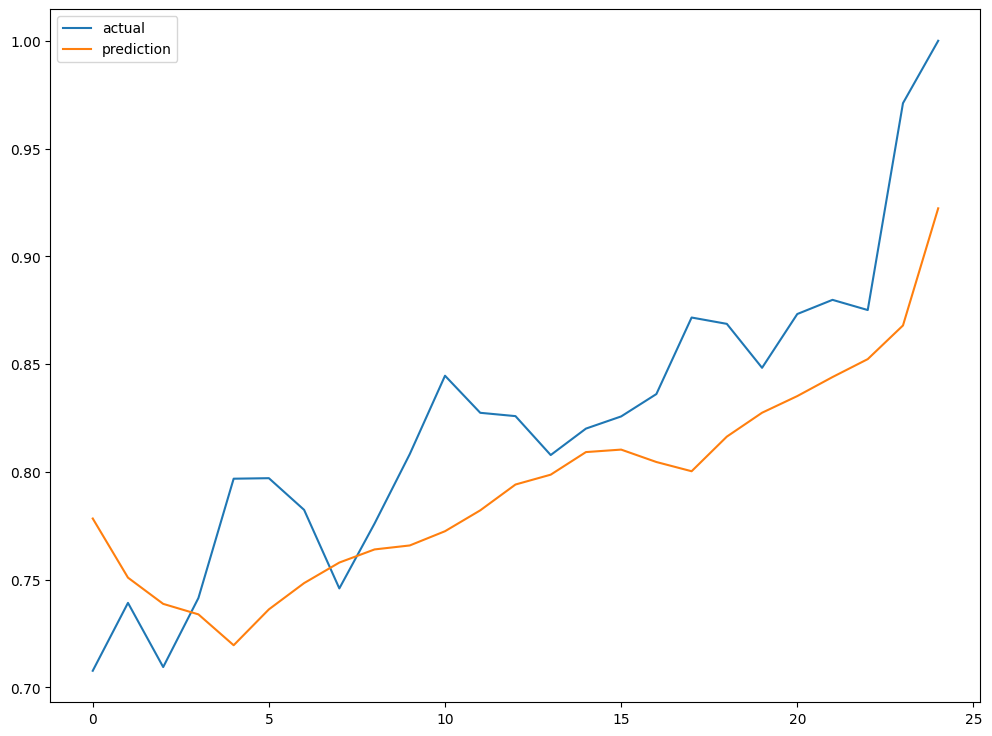

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(test_label, label="actual")
plt.plot(pred, label="prediction")
plt.legend()
plt.show()

- 정규화 이전 값으로 복원하기
- sklearn.preprocessing.MinMaxScaler
  - fit(self, X, y=None)
    - 데이터를 분석하여 최소값과 최대값을 계산해 이후 스케일링에 필요한 기준을 설정
  - transform(self, X)
    - 기준에 따라 데이터를 정규화하여 범위 내로 스케일링
  - fit_transform(self, X, y=None, \*\*fit_params)
    - 데이터를 학습하고 동시에 변환을 수행하여 정규화된 결과를 반환
  - inverse_transform(self, X)
    - 정규화된 데이터를 원래의 스케일로 복원하여 원래 값으로 되돌림


In [28]:
print(df_scaled["Open"][0])

# 정규화 이전 값으로 복원하기
df_price_ori = scaler.inverse_transform(df_scaled)
print(int(df_price_ori[0][0]))
print(df_price["Open"]["NVDA"][0])

0.004187658852839171
14
14.83780937810625


In [29]:
print(min(df_price["Open"]["NVDA"]), max(df_price["Open"]["NVDA"]))
print(min(df_price["Low"]["NVDA"]), max(df_price["Low"]["NVDA"]))
print(min(df_price["High"]["NVDA"]), max(df_price["High"]["NVDA"]))
print(min(df_price["Close"]["NVDA"]), max(df_price["Close"]["NVDA"]))

14.46114496790957 104.40744275224449
14.021536170907764 102.95902173434023
14.55106598124575 106.43263768991142
14.252331733703613 106.42664337158203


In [30]:
scaler.data_max_

array([1.04407443e+02, 1.06432638e+02, 1.02959022e+02, 1.06426643e+02,
       1.54391100e+09])

In [31]:
scaler.data_min_

array([1.44611450e+01, 1.45510660e+01, 1.40215362e+01, 1.42523317e+01,
       1.98209000e+08])

In [32]:
scaler.min_

array([-0.16077532, -0.15836762, -0.15765609, -0.15462369, -0.14729041])

In [34]:
scaler.scale_

array([1.11177450e-02, 1.08835753e-02, 1.12438528e-02, 1.08490097e-02,
       7.43106572e-10])

In [37]:
int((0.004187658852839171 - scaler.min_[0]) / scaler.scale_[0])

14

In [38]:
scaler.scale_[0] * 14.83780937810625 + scaler.min_[0]

np.float64(0.004187658852839171)

In [40]:
pred

array([[0.7783667 ],
       [0.75093126],
       [0.73876345],
       [0.73389447],
       [0.7195723 ],
       [0.7362107 ],
       [0.7484019 ],
       [0.75793207],
       [0.7640226 ],
       [0.76586664],
       [0.7724701 ],
       [0.7821511 ],
       [0.79413116],
       [0.7987037 ],
       [0.809185  ],
       [0.8103343 ],
       [0.80457926],
       [0.8002938 ],
       [0.8163563 ],
       [0.827441  ],
       [0.835165  ],
       [0.84399235],
       [0.85231185],
       [0.86792076],
       [0.922271  ]], dtype=float32)

In [ ]:
ori_pred = (pred - scaler.min_[3]) / scaler.scale_[3]
ori_pred

array([[85.99774512],
       [83.46890399],
       [82.34734435],
       [81.89854908],
       [80.57841368],
       [82.11204658],
       [83.23575988],
       [84.11419827],
       [84.67558793],
       [84.84556183],
       [85.45423299],
       [86.34657125],
       [87.45082474],
       [87.87229276],
       [88.83840468],
       [88.94434032],
       [88.41387099],
       [88.01886215],
       [89.49941186],
       [90.52113422],
       [91.23309291],
       [92.04674585],
       [92.81358977],
       [94.25233001],
       [99.26202752]])

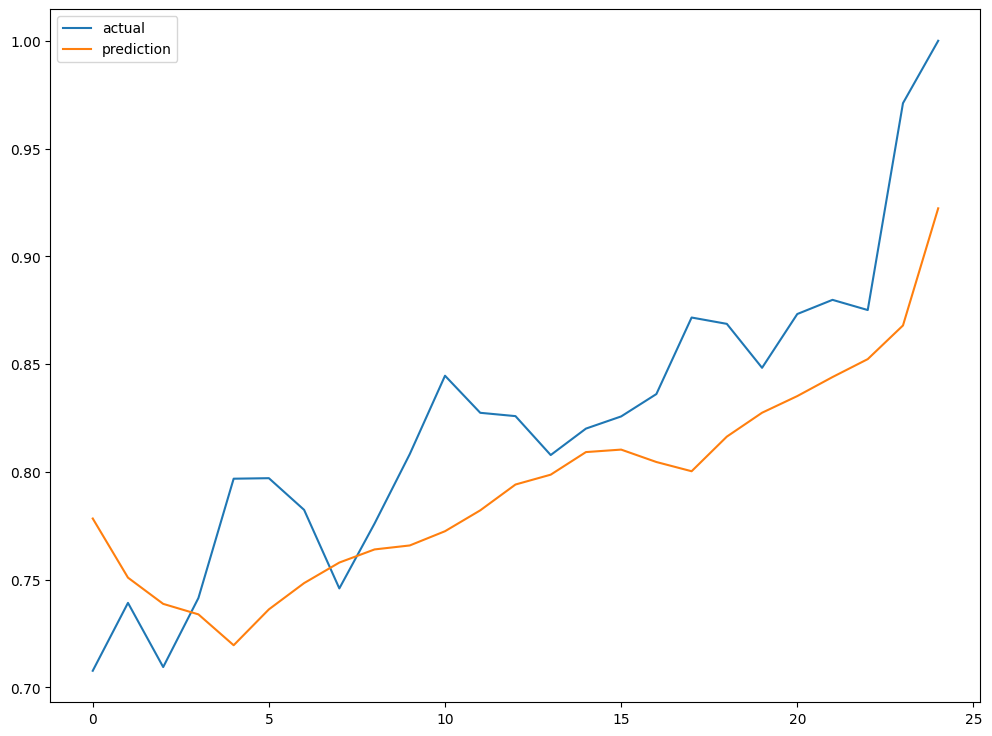

In [41]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label="actual")
plt.plot(pred, label="prediction")
plt.legend()
plt.show()


In [42]:
test_label

array([[0.70772459],
       [0.73922845],
       [0.70944888],
       [0.74149498],
       [0.79683551],
       [0.79707397],
       [0.78237957],
       [0.74593037],
       [0.77603531],
       [0.80826574],
       [0.84460634],
       [0.82740662],
       [0.82586674],
       [0.80781025],
       [0.82007556],
       [0.82572578],
       [0.83610407],
       [0.87160951],
       [0.86867063],
       [0.84828255],
       [0.8732363 ],
       [0.87980818],
       [0.87507995],
       [0.97104467],
       [1.        ]])

In [43]:
ori_test_label = (test_label - scaler.min_[3]) / scaler.scale_[3]
ori_test_label

array([[ 79.48635864],
       [ 82.39020538],
       [ 79.64529419],
       [ 82.59912109],
       [ 87.70009613],
       [ 87.72207642],
       [ 86.36763   ],
       [ 83.00794983],
       [ 85.78285217],
       [ 88.75366974],
       [ 92.10334015],
       [ 90.51796722],
       [ 90.37602997],
       [ 88.71168518],
       [ 89.84223175],
       [ 90.36303711],
       [ 91.31964874],
       [ 94.59233856],
       [ 94.32144928],
       [ 92.44219208],
       [ 94.74228668],
       [ 95.34804535],
       [ 94.91222382],
       [103.75770569],
       [106.42664337]])

In [44]:
df_price[-TEST_SIZE:]

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
321,2024-04-15,85.966774,90.576938,85.894804,89.062542,443077000
322,2024-04-16,87.380219,88.082934,86.029758,86.398607,370453000
323,2024-04-17,84.001556,88.739668,83.916584,88.304836,495400000
324,2024-04-18,84.637299,86.155699,82.369204,84.936183,447260000
325,2024-04-19,76.169685,84.290454,75.575928,83.116925,875198000
326,2024-04-22,79.486359,80.041138,76.369603,78.072920,596341000
327,2024-04-23,82.390205,82.736068,80.232068,80.736864,438559000
328,2024-04-24,79.645294,84.048540,79.151487,83.916589,512208000
329,2024-04-25,82.599121,83.289840,78.191871,78.836611,424641000


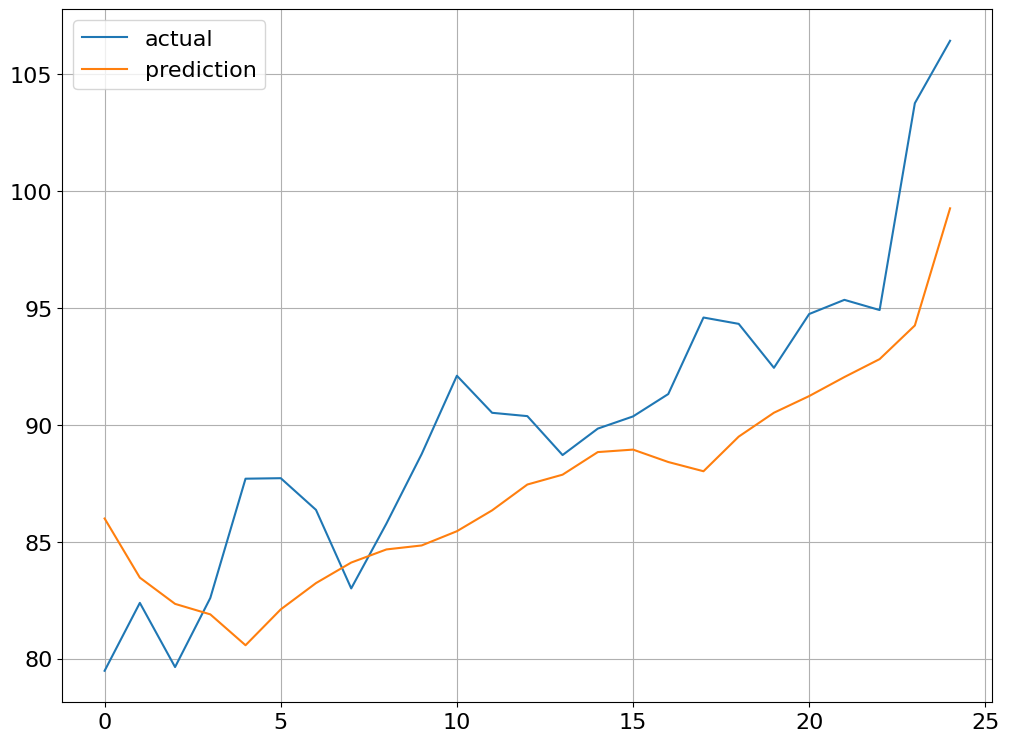

In [45]:
plt.figure(figsize=(12, 9))
plt.plot(ori_test_label, label="actual")
plt.plot(ori_pred, label="prediction")
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()